In [1]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt

# Load config file
with open("config.yaml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)

# Price loading
prices = pd.read_csv(cfg["Prices_path"], index_col=0)
prices.index = pd.to_datetime(prices.index)   

# Load market cap and set index to date
market_cap = pd.read_excel(cfg["Tickers_path"], sheet_name="MarketCaps")
market_cap = market_cap.set_index("Date")
market_cap.index = pd.to_datetime(market_cap.index)

# Dictionnaire de correspondance pour les sedols to tickers
correspondance = pd.read_excel(cfg["Tickers_path"], sheet_name="Mapping")
sedols_to_tickers = correspondance[["Sedol", "Tickers"]]
sedol_to_ticker = dict(zip(sedols_to_tickers["Sedol"], sedols_to_tickers["Tickers"]))

market_cap.columns = [sedol_to_ticker[col] for col in market_cap.columns]

market_cap = market_cap.resample('D').ffill()

cutoff_day_start = prices.index[0]
cutoff_day_end = prices.index[-1]

market_cap = market_cap[market_cap.index >= cutoff_day_start]
market_cap = market_cap[market_cap.index <= cutoff_day_end]
 


In [2]:
df_merged = pd.merge(market_cap, prices, on='Date', how='inner')

result = pd.DataFrame(index=df_merged.index)

for stock in prices.columns:
    result[stock] = df_merged[stock + "_x"] * df_merged[stock + "_y"]

index = result.sum(axis=1)

C:\Users\fotis\AppData\Local\Temp\ipykernel_12140\1405545304.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result[stock] = df_merged[stock + "_x"] * df_merged[stock + "_y"]
C:\Users\fotis\AppData\Local\Temp\ipykernel_12140\1405545304.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result[stock] = df_merged[stock + "_x"] * df_merged[stock + "_y"]
C:\Users\fotis\AppData\Local\Temp\ipykernel_12140\1405545304.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

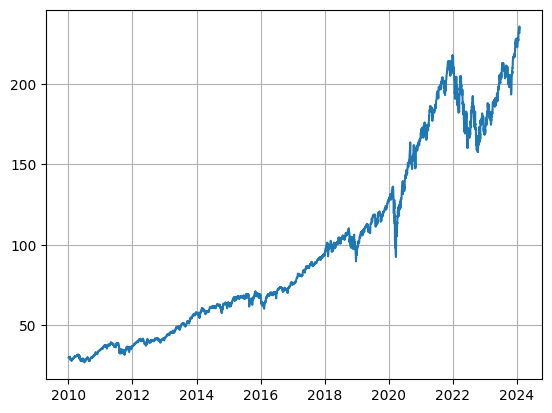

In [3]:
plt.plot(index)
# add grid line
plt.grid()

In [43]:
concat = pd.concat([market_cap, prices], axis=1)
concat.ffill(inplace=True)

concat['AMZN']


,AMZN,AMZN
Date,,
2010-01-04,0.005288,6.695000
2010-01-05,0.005288,6.734500
2010-01-06,0.005288,6.612500
2010-01-07,0.005288,6.500000
2010-01-08,0.005288,6.676000
...,...,...
2024-03-12,0.048648,175.389999
2024-03-13,0.048648,176.559998
2024-03-14,0.048648,178.750000
